In [41]:
# Imports

from citipy import citipy

import pandas as pd

import timeit

import random

import numpy as np

from datetime import datetime

import time

from config import weather_api_key

import requests

import matplotlib.pyplot as plt

%matplotlib inline



In [22]:
# Starting URL for WWeather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [23]:
# Create a zip with random latitudes and longitudes

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [24]:
# Open the zip to query
coordinates = list(lat_lngs)

In [25]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

604

In [26]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging 

print("Beginning Data Retrieval      ")

print("----------------------------")





# Create counter

record_count = 1

set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >=50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval      
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | makat
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | berlevag
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | manzil tamim
City not found. Skipping...
Processing Record 8 of Set 1 | isiolo
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | chirongui
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | aksha
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | eastbourne
Processing Record 19 of Set 1 | awjilah
Processing Record 20 of Set 1 | grand gaube
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | cape town
Processing Recor

Processing Record 38 of Set 4 | kamenka
Processing Record 39 of Set 4 | edd
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | kot samaba
Processing Record 44 of Set 4 | kemin
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | mansa
Processing Record 47 of Set 4 | curup
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | tiarei
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | trairi
Processing Record 4 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 5 of Set 5 | jishou
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | ayagoz
Processing Record 9 of Set 5 | kalmunai
Processing Record 10 of Set 5 | vila do

Processing Record 24 of Set 8 | flinders
Processing Record 25 of Set 8 | vestmannaeyjar
Processing Record 26 of Set 8 | zyryanka
Processing Record 27 of Set 8 | paradwip
City not found. Skipping...
Processing Record 28 of Set 8 | oksbol
Processing Record 29 of Set 8 | bongor
Processing Record 30 of Set 8 | turukhansk
Processing Record 31 of Set 8 | aden
Processing Record 32 of Set 8 | tazovskiy
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | toledo
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | oranjestad
Processing Record 37 of Set 8 | oni
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | opuwo
Processing Record 40 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 41 of Set 8 | nagato
Processing Record 42 of Set 8 | pampa
Processing Record 43 of Set 8 | wanlaweyn
Processing Record 44 of Set 8 | mercedes
Processing Record 45 of Set 8 | sabaudia
Processing Record 46 of Set 8 | tuggurt
City not found.

Processing Record 17 of Set 12 | pierre
Processing Record 18 of Set 12 | bang saphan
Processing Record 19 of Set 12 | coachella
Processing Record 20 of Set 12 | saint-pierre
Processing Record 21 of Set 12 | lasa
Processing Record 22 of Set 12 | sibu
Processing Record 23 of Set 12 | moose factory
Processing Record 24 of Set 12 | kingman
Processing Record 25 of Set 12 | pokosnoye
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | chippewa falls
Processing Record 28 of Set 12 | rio gallegos
Processing Record 29 of Set 12 | iskateley
Processing Record 30 of Set 12 | umm lajj
Processing Record 31 of Set 12 | tabuk
Processing Record 32 of Set 12 | santiago
Processing Record 33 of Set 12 | peterhead
Processing Record 34 of Set 12 | asfi
Processing Record 35 of Set 12 | disraeli
Processing Record 36 of Set 12 | tahe
Processing Record 37 of Set 12 | batagay-alyta
Processing Record 38 of Set 12 | bonthe
Processing Record 39 of Set 12 | panguna
Processing Record 40 of Set 12 |

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.48,68,100,9.95,PF,2022-06-19 02:53:52
1,Touros,-5.1989,-35.4608,75.27,87,12,9.73,BR,2022-06-19 02:50:57
2,Makat,47.6469,53.3463,74.71,41,31,8.46,KZ,2022-06-19 02:53:52
3,Longyearbyen,78.2186,15.6401,40.84,75,100,12.66,SJ,2022-06-19 02:53:52
4,Berlevag,70.8578,29.0864,42.80,87,100,5.75,NO,2022-06-19 02:53:53
5,Namatanai,-3.6667,152.4333,84.54,67,36,3.83,PG,2022-06-19 02:53:53
6,Isiolo,0.3546,37.5822,63.50,80,73,5.12,KE,2022-06-19 02:53:54
7,Coquimbo,-29.9533,-71.3436,55.13,87,100,2.30,CL,2022-06-19 02:53:54
8,Albany,42.6001,-73.9662,55.40,58,85,10.40,US,2022-06-19 02:51:26
9,Kaitangata,-46.2817,169.8464,46.51,84,100,10.42,NZ,2022-06-19 02:49:19


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-06-19 02:53:52,-23.1203,-134.9692,74.48,68,100,9.95
1,Touros,BR,2022-06-19 02:50:57,-5.1989,-35.4608,75.27,87,12,9.73
2,Makat,KZ,2022-06-19 02:53:52,47.6469,53.3463,74.71,41,31,8.46
3,Longyearbyen,SJ,2022-06-19 02:53:52,78.2186,15.6401,40.84,75,100,12.66
4,Berlevag,NO,2022-06-19 02:53:53,70.8578,29.0864,42.80,87,100,5.75
5,Namatanai,PG,2022-06-19 02:53:53,-3.6667,152.4333,84.54,67,36,3.83
6,Isiolo,KE,2022-06-19 02:53:54,0.3546,37.5822,63.50,80,73,5.12
7,Coquimbo,CL,2022-06-19 02:53:54,-29.9533,-71.3436,55.13,87,100,2.30
8,Albany,US,2022-06-19 02:51:26,42.6001,-73.9662,55.40,58,85,10.40
9,Kaitangata,NZ,2022-06-19 02:49:19,-46.2817,169.8464,46.51,84,100,10.42


In [33]:
# Create the output file (csv)

output_data_file = "C:/Users/Keeron/Documents/Rice University Data Anlyst Bootcamp/Challenges/Challenge 6/World_Weather_Analysis/cities.csv"

# Export the City_Data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

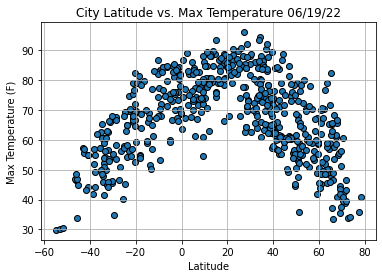

In [43]:
# Build the scatter plot for latitude vs. max temperature

temp_plot_max_temps = plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("C:/Users/Keeron/Documents/Rice University Data Anlyst Bootcamp/Challenges/Challenge 6/World_Weather_Analysis/Fig1.png")

# Show plot

temp_plot_max_temps

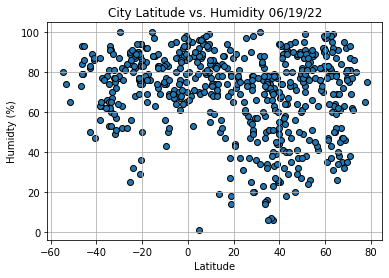

In [49]:
# Build the scatter plot for latitude vs. Humidity

temp_plot_humidity = plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidty (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("C:/Users/Keeron/Documents/Rice University Data Anlyst Bootcamp/Challenges/Challenge 6/World_Weather_Analysis/Fig2.png")

# Show plot

temp_plot_humidity

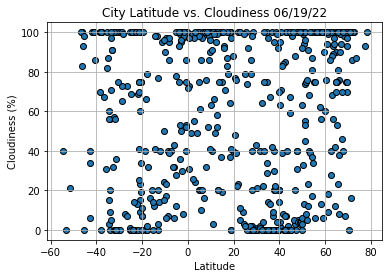

In [48]:
# Build the scatter plot for latitude vs. cloudiness

temp_plot_cloudiness = plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("C:/Users/Keeron/Documents/Rice University Data Anlyst Bootcamp/Challenges/Challenge 6/World_Weather_Analysis/Fig3.png")

# Show plot

temp_plot_cloudiness

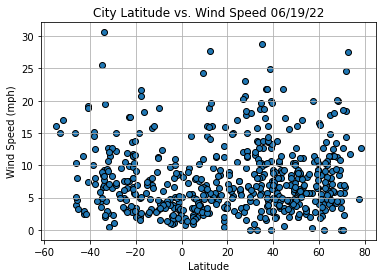

In [50]:
# Build the scatter plot for latitude vs. Wind Speed

temp_plot_wind_speed = plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("C:/Users/Keeron/Documents/Rice University Data Anlyst Bootcamp/Challenges/Challenge 6/World_Weather_Analysis/Fig4.png")

# Show plot

temp_plot_wind_speed